<a href="https://colab.research.google.com/github/azkalltlhn/Recommendation_ThingsToDoWeekend/blob/main/Task/RecommendationEngineMaster_ThingsToDoWeekend_Azka_Lailatul_Haa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library and Get the data**

In [26]:
# import pandas library
import pandas as pd

In [27]:
# Get the data
path = 'https://raw.githubusercontent.com/TracyRenee61/AV-Recommendation-Engine/master/Things_to_do_weekend%20-%20Sheet1.csv'
df = pd.read_csv(path)

In [28]:
# Check the head of the data
df

,user_id,activity_id,thing_to_do,genre,rating
0,1,1,make beds,housework,3
1,1,2,mop floors,housework,3
2,1,3,vacuum,housework,4
3,1,4,clean toilet,housework,1
4,1,5,dust furniture,housework,4
...,...,...,...,...,...
298,3,97,read a book,outing,7
299,3,98,write a book,work,3
300,3,99,write a blog post,work,3
301,3,100,work a part time job,work,3


**Remove the whitespace**

In [29]:
# Remove white space
df.columns = df.columns.str.replace('','')

**Created a column, rate_count**

In [30]:
df['rate_count'] = df['user_id'].groupby(df['activity_id']).transform('count')
df['rate_count'] = df['rate_count'].astype(float)
df

,user_id,activity_id,thing_to_do,genre,rating,rate_count
0,1,1,make beds,housework,3,3.0
1,1,2,mop floors,housework,3,3.0
2,1,3,vacuum,housework,4,3.0
3,1,4,clean toilet,housework,1,3.0
4,1,5,dust furniture,housework,4,3.0
...,...,...,...,...,...,...
298,3,97,read a book,outing,7,3.0
299,3,98,write a book,work,3,3.0
300,3,99,write a blog post,work,3,3.0
301,3,100,work a part time job,work,3,3.0


**Created another column, average_rating**

In [31]:
df['average_rating'] = df['rating'].groupby(df['thing_to_do']).transform('sum')/df['rate_count']
df

,user_id,activity_id,thing_to_do,genre,rating,rate_count,average_rating
0,1,1,make beds,housework,3,3.0,3.333333
1,1,2,mop floors,housework,3,3.0,2.666667
2,1,3,vacuum,housework,4,3.0,3.333333
3,1,4,clean toilet,housework,1,3.0,1.666667
4,1,5,dust furniture,housework,4,3.0,3.333333
...,...,...,...,...,...,...,...
298,3,97,read a book,outing,7,3.0,7.666667
299,3,98,write a book,work,3,3.0,5.000000
300,3,99,write a blog post,work,3,3.0,4.666667
301,3,100,work a part time job,work,3,3.0,3.333333


**Calculate the average rating of the dataframe**

In [32]:
# calculate average
# Calculate mean of rating average column
C = df['average_rating'].mean()
print(C)

6.026402640264027


**Calculate the minimum number of ratings required**

In [33]:
# Calculate the minimum number of ratings required to be in the chart, m
m = df['rate_count'].quantile(0.90)
print(m)

3.0


**Determine the score for each thing to do**

In [34]:
# Calculate weighted average
v = df['rate_count']
R = df['average_rating']
df['score'] = (v/(v+m) * R) + (m/(m+v) * C)
df

,user_id,activity_id,thing_to_do,genre,rating,rate_count,average_rating,score
0,1,1,make beds,housework,3,3.0,3.333333,4.679868
1,1,2,mop floors,housework,3,3.0,2.666667,4.346535
2,1,3,vacuum,housework,4,3.0,3.333333,4.679868
3,1,4,clean toilet,housework,1,3.0,1.666667,3.846535
4,1,5,dust furniture,housework,4,3.0,3.333333,4.679868
...,...,...,...,...,...,...,...,...
298,3,97,read a book,outing,7,3.0,7.666667,6.846535
299,3,98,write a book,work,3,3.0,5.000000,5.513201
300,3,99,write a blog post,work,3,3.0,4.666667,5.346535
301,3,100,work a part time job,work,3,3.0,3.333333,4.679868


**Calculate the average of each thing to do**

In [35]:
# Calculate mean rating of all movies
df.groupby('thing_to_do')['rating'].mean().sort_values(ascending=False)

,rating
thing_to_do,
retire from work,9.000000
go to london,8.666667
go to isle of wight,8.666667
go to hollywood,8.666667
go to bournemouth,8.333333
get a facial,8.333333
go to new york city,8.333333
go to the movies,8.333333
go to a wildlife park,8.333333


**PERBEDAAN**

In [36]:
# Calculate mean rating of all movies
df.groupby('thing_to_do')['rating'].mean().sort_values(ascending=True)

,rating
thing_to_do,
clean mold off walls,1.666667
clean toilet,1.666667
clean oven,2.000000
clean sideboards,2.000000
clean floorboards,2.333333
paint room,2.666667
clean windows,2.666667
see stepchildren,2.666667
mop floors,2.666667


**Penjelasan:** Kedua kode tersebut sama-sama melakukan group by dari column thing to do dan rating, namun yang menjadi beda adalah pengurutannya.
*   Kode pertama: mengurutkan secara menurun (dari besar ke kecil)
*   Kode kedua: mengurutkan secara naik (dari kecil ke besar) berdasarkan nilai rata-rata peringkat.

**Calculate the count rating of all things to do**

In [37]:
# Calculate count rating of all movies
df.groupby('thing_to_do')['rating'].count().sort_values(ascending=False)

,rating
thing_to_do,
bake a cake,3
make beds,3
make tiramasu,3
make tempura,3
make sushi,3
make strawberry shortcake,3
make spaghetti bolenaise,3
make fruitcake,3
make chocolate cake,3


**PERBEDAAN**

In [38]:
# Calculate count rating of all movies
df.groupby('thing_to_do')['rating'].count().sort_values(ascending=True)

,rating
thing_to_do,
bake a cake,3
make sushi,3
make strawberry shortcake,3
make spaghetti bolenaise,3
make fruitcake,3
make chocolate cake,3
make carrot cake,3
make bunt cake,3
make beef strogannauf,3


**Penjelasan:** Kedua kode tersebut sama-sama melakukan group by dari column thing to do dan rating, namun yang menjadi beda adalah pengurutannya.
*   Kode pertama: mengurutkan secara menurun (dari besar ke kecil)
*   Kode kedua: mengurutkan secara naik (dari kecil ke besar) berdasarkan nilai rata-rata peringkat.

**Created a data frame**

In [39]:
ratings = pd.DataFrame(df.groupby('thing_to_do')['rating'].mean())
ratings ['num_ratings'] = pd.DataFrame(df.groupby('thing_to_do')['rating'].count())
ratings

,rating,num_ratings
thing_to_do,,
bake a cake,4.333333,3
clean floorboards,2.333333,3
clean mold off walls,1.666667,3
clean oven,2.000000,3
clean sideboards,2.000000,3
...,...,...
watch a youtube video,6.666667,3
watch an american football game,4.666667,3
work a part time job,3.333333,3


**PERBEDAAN**

In [40]:
ratings = pd.DataFrame(df.groupby('genre')['rating'].mean())
ratings ['num_ratings'] = pd.DataFrame(df.groupby('genre')['rating'].count())
ratings

,rating,num_ratings
genre,,
cooking,5.088889,45
dating,6.333333,3
eat out,6.787879,33
family,5.777778,9
housework,2.857143,42
outing,7.287037,108
schooling,5.666667,3
self care,7.666667,18
sports,6.100000,30


**Penjelasan:** Kedua kode tersebut sama-sama mencari nilai rata-rata dan jumlah, namun yang menjadi beda adalah pada kategorinya.
*   Kode pertama: menghitung nilai peringkat dan jumlah rating untuk setiap thing to do.
*   Kode kedua: menghitung nilai peringkat dan jumlah rating untuk setiap genre.

**Create a bar chart for num of ratings for column**

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

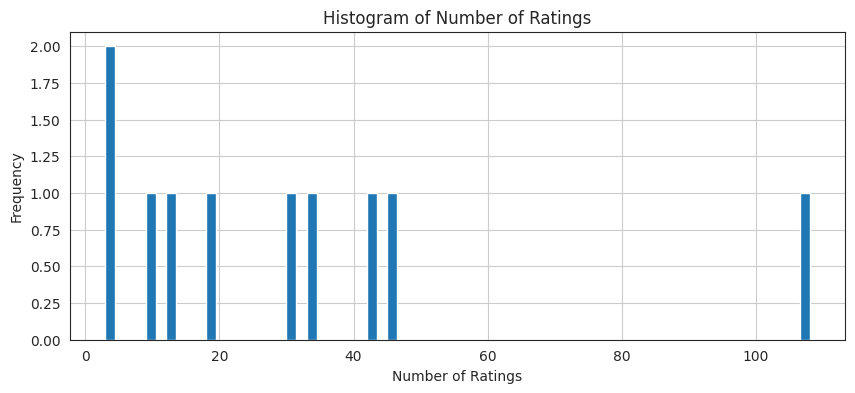

In [42]:
# plot graph of 'num of ratings column'
plt.figure(figsize =(10, 4))
ratings['num_ratings'].hist(bins=70)
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Ratings')
plt.show()

**Graph the ratings for each thing to do**

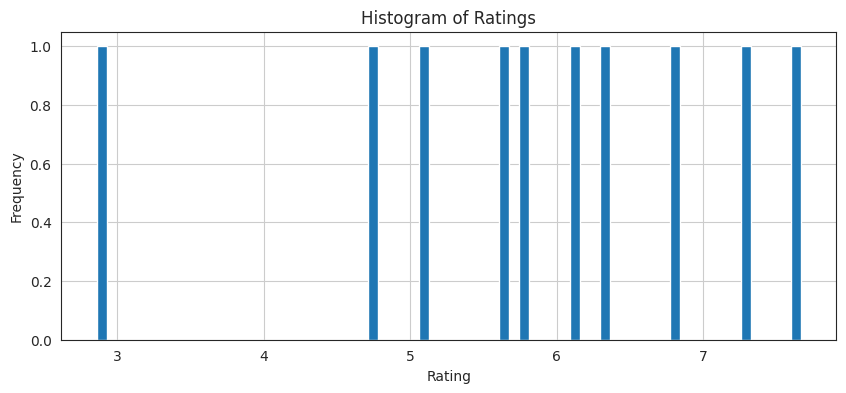

In [43]:
plt.figure(figsize=(10, 4))
ratings['rating'].hist(bins=70)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()

**Graph the score for each thing to do**

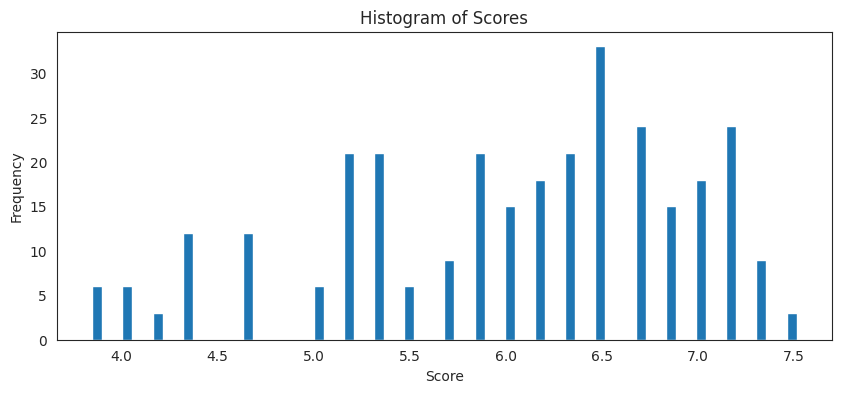

In [44]:
plt.figure(figsize=(10, 4))
plt.hist(df['score'], bins=70)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores')
plt.show()

**Created a Pivot Table**

In [45]:
activity_mat = df.pivot_table(index = 'user_id', columns = 'thing_to_do', values = 'rating')
print(activity_mat)

thing_to_do  bake a cake  clean floorboards  clean mold off walls  clean oven  \
user_id                                                                         
1                    6.0                2.0                   1.0         2.0   
2                    3.0                1.0                   1.0         1.0   
3                    4.0                4.0                   3.0         3.0   

thing_to_do  clean sideboards  clean toilet  clean windows  drive a car  \
user_id                                                                   
1                         2.0           1.0            2.0          7.0   
2                         1.0           1.0            2.0          2.0   
3                         3.0           3.0            4.0          8.0   

thing_to_do  dust furniture  eat fish and chips  ...  take a train  \
user_id                                          ...                 
1                       4.0                 8.0  ...           8.0   
2       

**Sorted the ratings of each thing to do**

In [46]:
ratings.sort_values('num_ratings', ascending = False).head(10)

,rating,num_ratings
genre,,
outing,7.287037,108
cooking,5.088889,45
housework,2.857143,42
eat out,6.787879,33
sports,6.100000,30
self care,7.666667,18
work,4.750000,12
family,5.777778,9
dating,6.333333,3


**PERBEDAAN**

In [47]:
ratings.sort_values('num_ratings', ascending = True).head(15)

,rating,num_ratings
genre,,
dating,6.333333,3
schooling,5.666667,3
family,5.777778,9
work,4.750000,12
self care,7.666667,18
sports,6.100000,30
eat out,6.787879,33
housework,2.857143,42
cooking,5.088889,45


**Penjelasan:** Kedua kode tersebut sama-sama mengurutkan DataFrame ratings berdasarkan kolom 'num_ratings', tetapi mereka berbeda dalam arah pengurutannya:, namun yang menjadi beda adalah pengurutannya.
*   Kode pertama: Kode ini mengurutkan DataFrame ratings secara menurun (descending) berdasarkan nilai 'num_ratings'. Dengan kata lain, kategori dengan jumlah rating tertinggi akan muncul di bagian atas. Kemudian, head(10) digunakan untuk membatasi output hanya menampilkan 10 baris teratas dari hasil pengurutan.
*   Kode kedua: Kode ini mengurutkan DataFrame ratings secara naik (ascending) berdasarkan nilai 'num_ratings'. Dengan kata lain, kategori dengan jumlah rating terendah akan muncul di bagian atas. Kemudian, head(15) digunakan untuk membatasi output hanya menampilkan 15 baris teratas dari hasil pengurutan.

**Created the recommendation of cake_user_ratings and
clean_user_ratings**

In [48]:
cake_user_ratings = activity_mat['make carrot cake']
clean_user_ratings = activity_mat['make beds']
cake_user_ratings

,make carrot cake
user_id,
1,8.0
2,6.0
3,4.0


**Find the correlation**

In [49]:
similar_to_cake = activity_mat.corrwith(cake_user_ratings)
similar_to_clean = activity_mat.corrwith(clean_user_ratings)

corr_cake = pd.DataFrame(similar_to_cake, columns = ['Correlation'])
corr_cake.dropna(inplace = True)

corr_cake.head()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Correlation
thing_to_do,
bake a cake,0.654654
clean floorboards,-0.654654
clean mold off walls,-0.866025
clean oven,-0.500000
clean sideboards,-0.500000


**Find another correlation**

In [50]:
corr_cake_top = corr_cake.sort_values('Correlation', ascending=False).head(10)
corr_cake = corr_cake_top.join(ratings['num_ratings'], lsuffix='_corr_cake', rsuffix='_ratings')

corr_cake.head()

,Correlation,num_ratings
thing_to_do,,
make carrot cake,1.000000,NaN
make strawberry shortcake,1.000000,NaN
go to wendys,1.000000,NaN
go to japanese restaurant,0.981981,NaN
see stepchildren,0.981981,NaN


**Notes:** Karena saya melakukan kesalahan pada kode diatas, yaitu saya memencet gambar convert dan melakukan suggest chart kemudian saya hapus kodenya dan ketika saya melakukan run kembali mengalami error. Jadi pada kode ini saya menggunakan issufix dan rssufix untuk mengalami error yang terjadi karena data mengalami tumpang tindih

**Kesimpulan:** Jadi kesimpulan dari tugas ini adalah kode-kode ini melakukan beberapa tugas pemrosesan data dan analisis, termasuk menghitung rata-rata rating, menghitung weighted average, membuat histogram dari jumlah rating dan rating, serta mencari korelasi antara aktivitas tertentu dengan rating pengguna lainnya. Selain itu, dilakukan juga visualisasi data dalam bentuk histogram dan pemrosesan untuk menemukan aktivitas yang paling berkorelasi dengan aktivitas lainnya.